# Network Analysis 

In [2]:
#Dependencies 
import os

# Data analysis
import pandas as pd
from collections import Counter
from itertools import combinations 
from tqdm import tqdm

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

# drawing
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

__Fake of Real News Data__

In [3]:
#Create datapath 
input_file = os.path.join("..", "data", "fake_or_real_news.csv")

In [4]:
#load in the data 
data = pd.read_csv(input_file)

__Extract the named individuals__

In [5]:
#Spacy allows us to extract on the words labelled as "People"
real_df = data[data["label"]=="REAL"]["text"]

In [6]:
text_entities = []

for text in tqdm(real_df):
    # create temporary list 
    tmp_entities = []
    # create doc object
    doc = nlp(text)
    # for every named entity
    for entity in doc.ents:
        # if that entity is a person
        if entity.label_ == "PERSON":
            # append to temp list
            tmp_entities.append(entity.text)
    # append temp list to main list
    text_entities.append(tmp_entities)

100%|██████████| 3171/3171 [09:27<00:00,  5.58it/s]


__Create the edgelist__

In [6]:
edgelist = []
# iterate over every document
for text in text_entities:
    # use itertools.combinations() to create edgelist
    edges = list(combinations(text, 2))
    # for each combination - i.e. each pair of 'nodes'
    for edge in edges:
        # append this to final edgelist
        edgelist.append(tuple(sorted(edge)))

__Count the edges__

In [7]:
counted_edges = []
for key, value in Counter(edgelist).items():
    source = key[0]
    target = key[1]
    weight = value
    counted_edges.append((source, target, weight))

In [72]:
#Put together out dataframe 
edges_df = pd.DataFrame(counted_edges, columns=["nodeA", "nodeB", "weight"])

In [9]:
#Filter the data to keep only the most connected nodes  (with 500 connections or more)
filtered = edges_df[edges_df["weight"]>500]

In [10]:
len(edges_df) #288614

288614

In [11]:
len(filtered) #169 

169

In [71]:
#Save the weighted edgelist as a csv file 
output_path = os.path.join("..", "Output", "weighted_edgelist.csv")
filtered.to_csv(output_path, index = False)

We've reduced our edgelist to contain only 169 which is much easier to plot in a meaningful way!

__Create the Network__

Now we can move on to create the network structure for our model 

A key problem network x denotes is the problem with visualising networks - in the future it reckons it mmight remove the option for plotting and focus instead on the calculated measures 

In [58]:
G=nx.from_pandas_edgelist(filtered, 'nodeA', 'nodeB', ["weight"])


In [49]:
# Prepare the data for plotting 
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")

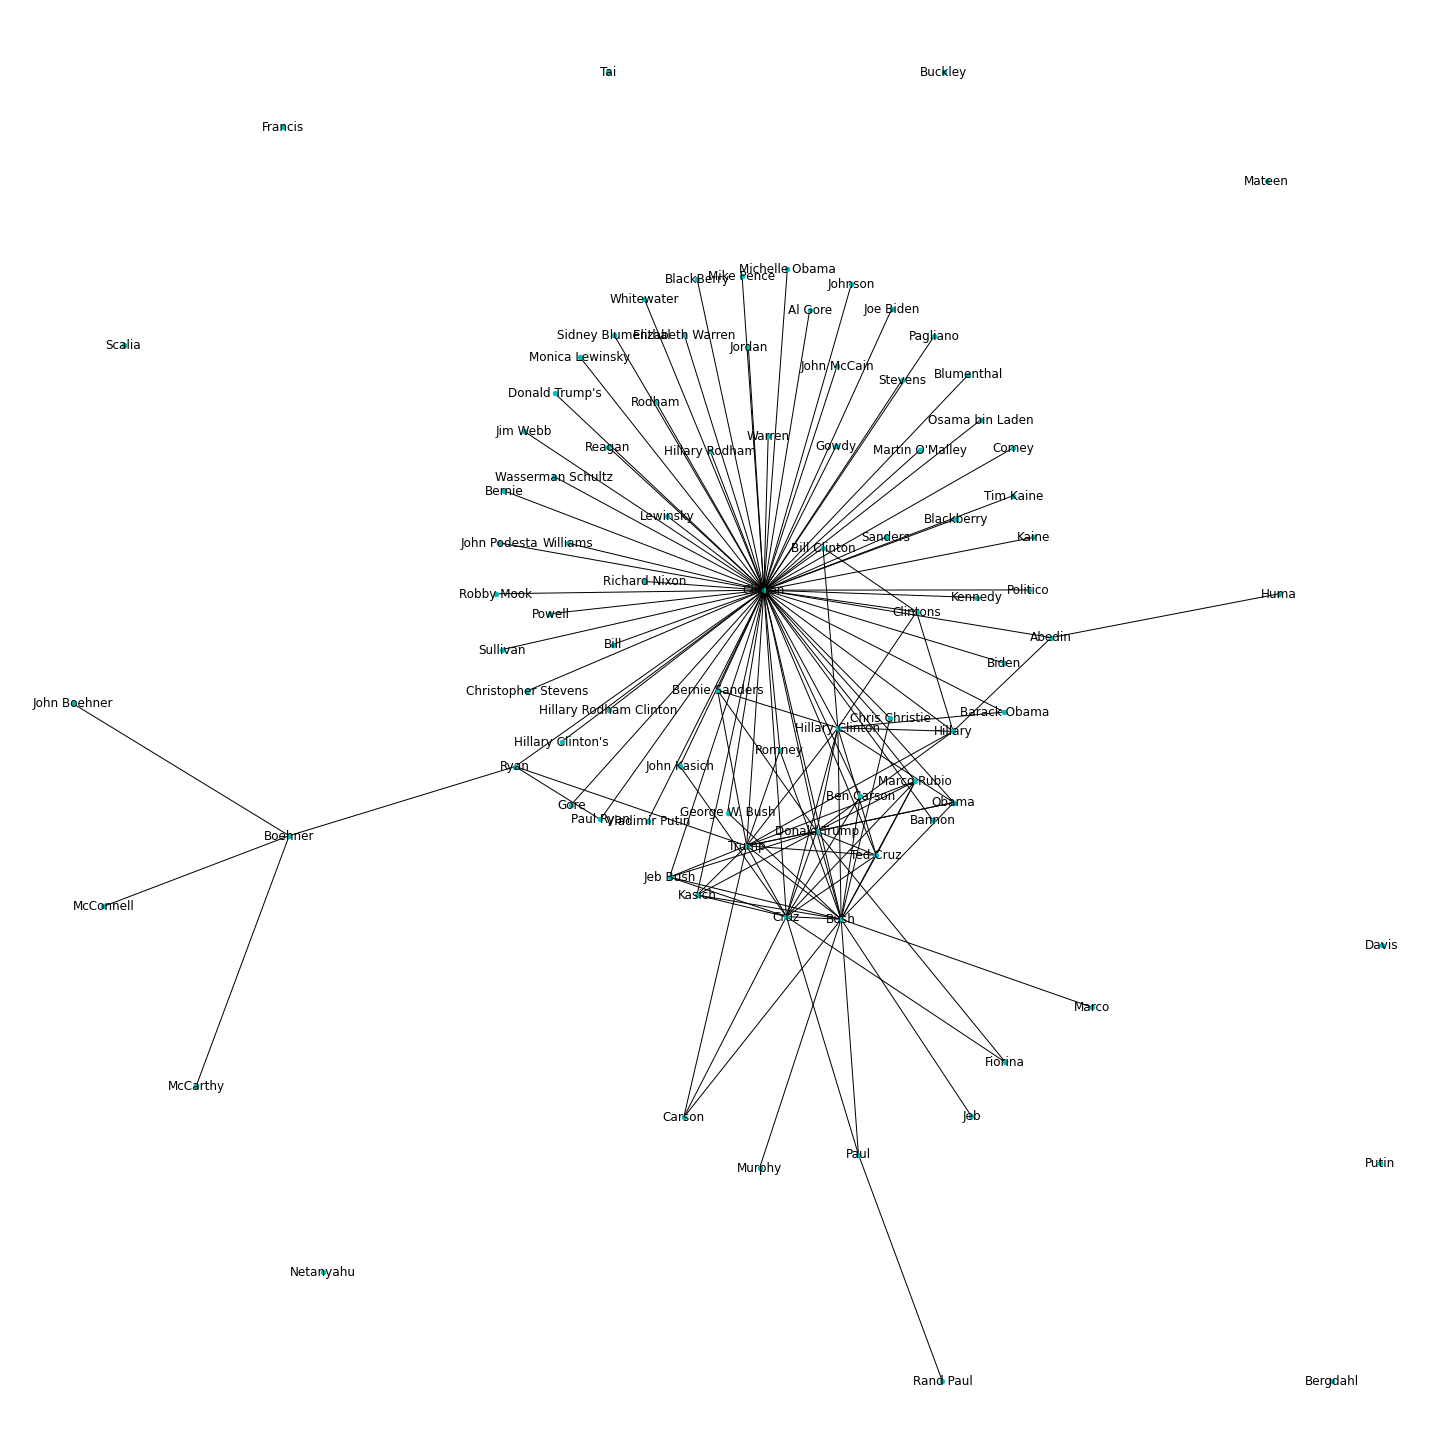

In [79]:
class_viz = nx.draw(G, pos, with_labels=True, node_size=20, node_color ="c", font_size=12)

__The above graph is interesting but it can be a bit difficult to read__

Let's experiment with a few different plotting options

__This plot is an Ego graph__

It focuses on the main egonet of the largest hub

In [40]:
from operator import itemgetter
#Find node with largest degree 
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

In [41]:
hub_ego = nx.ego_graph(G, largest_hub)

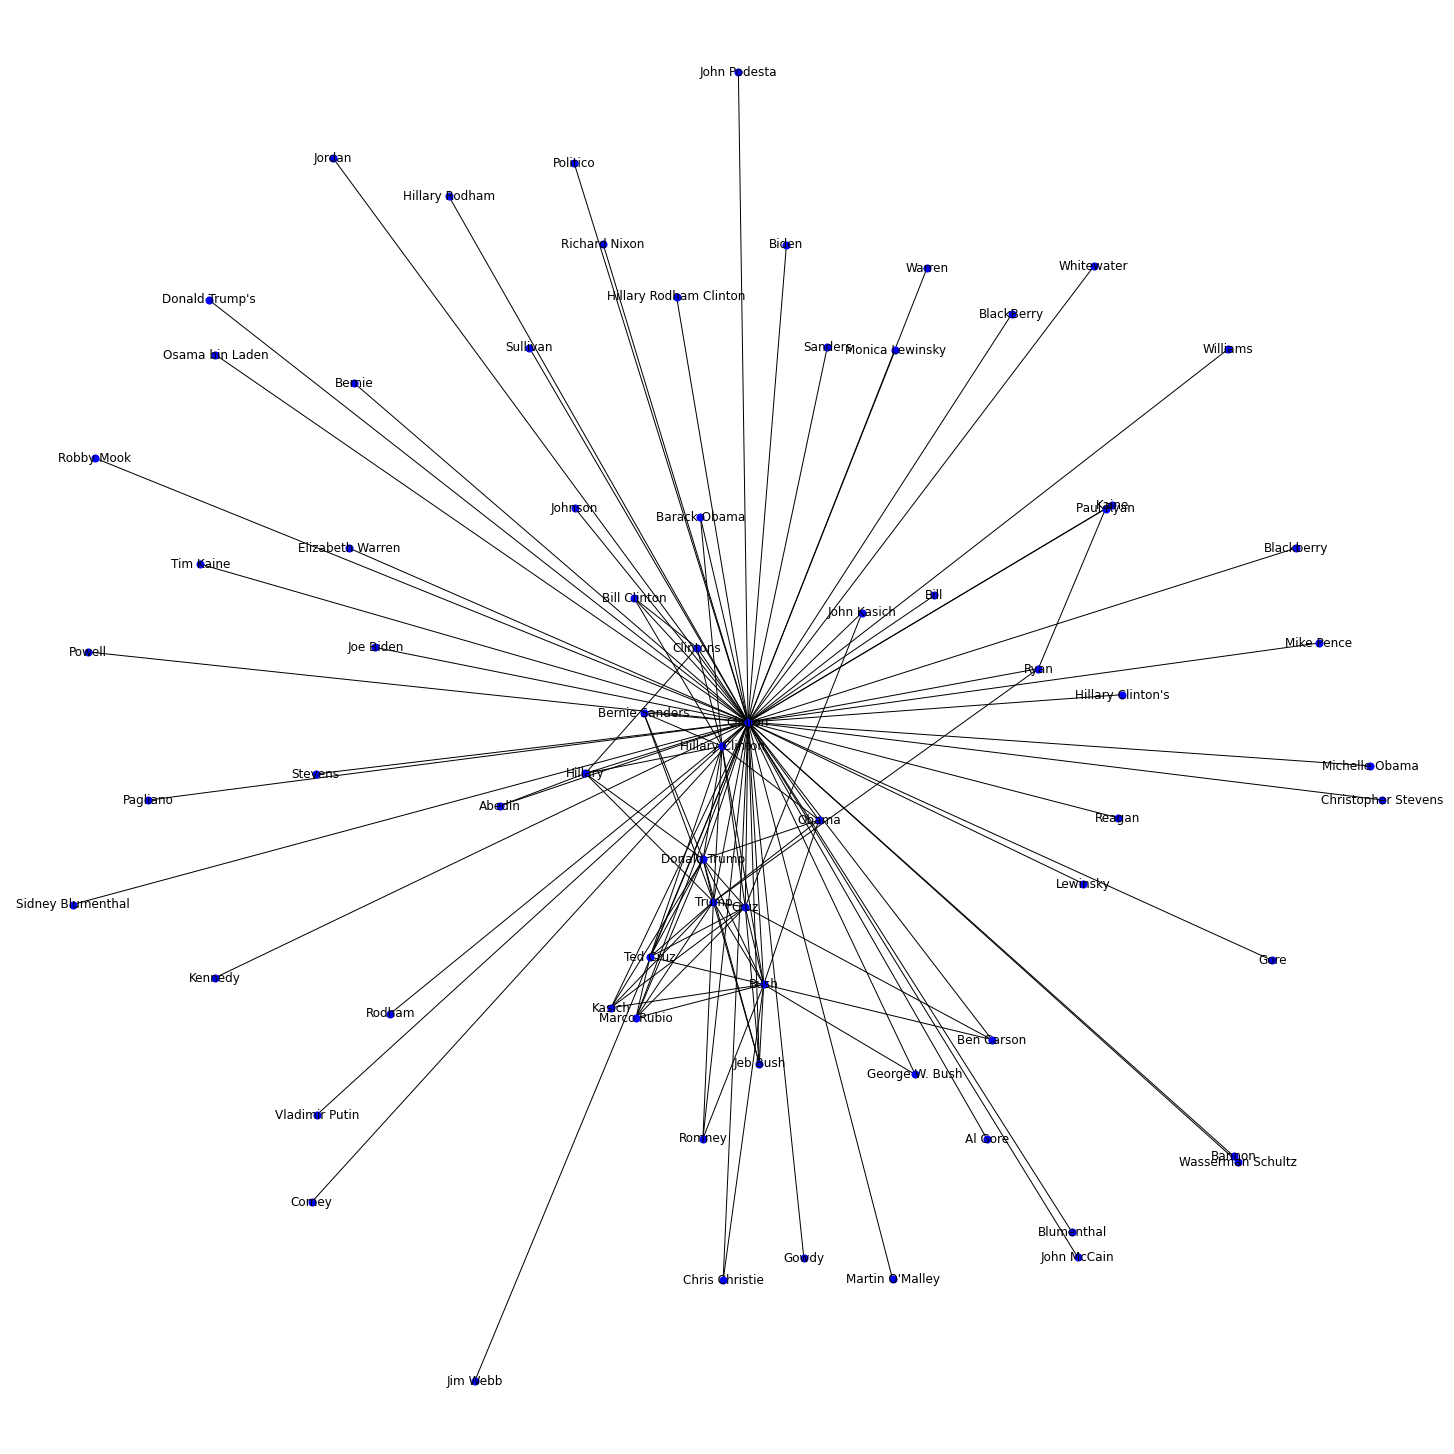

In [43]:
#Draw graph 
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)

__Alternative way to map the data__

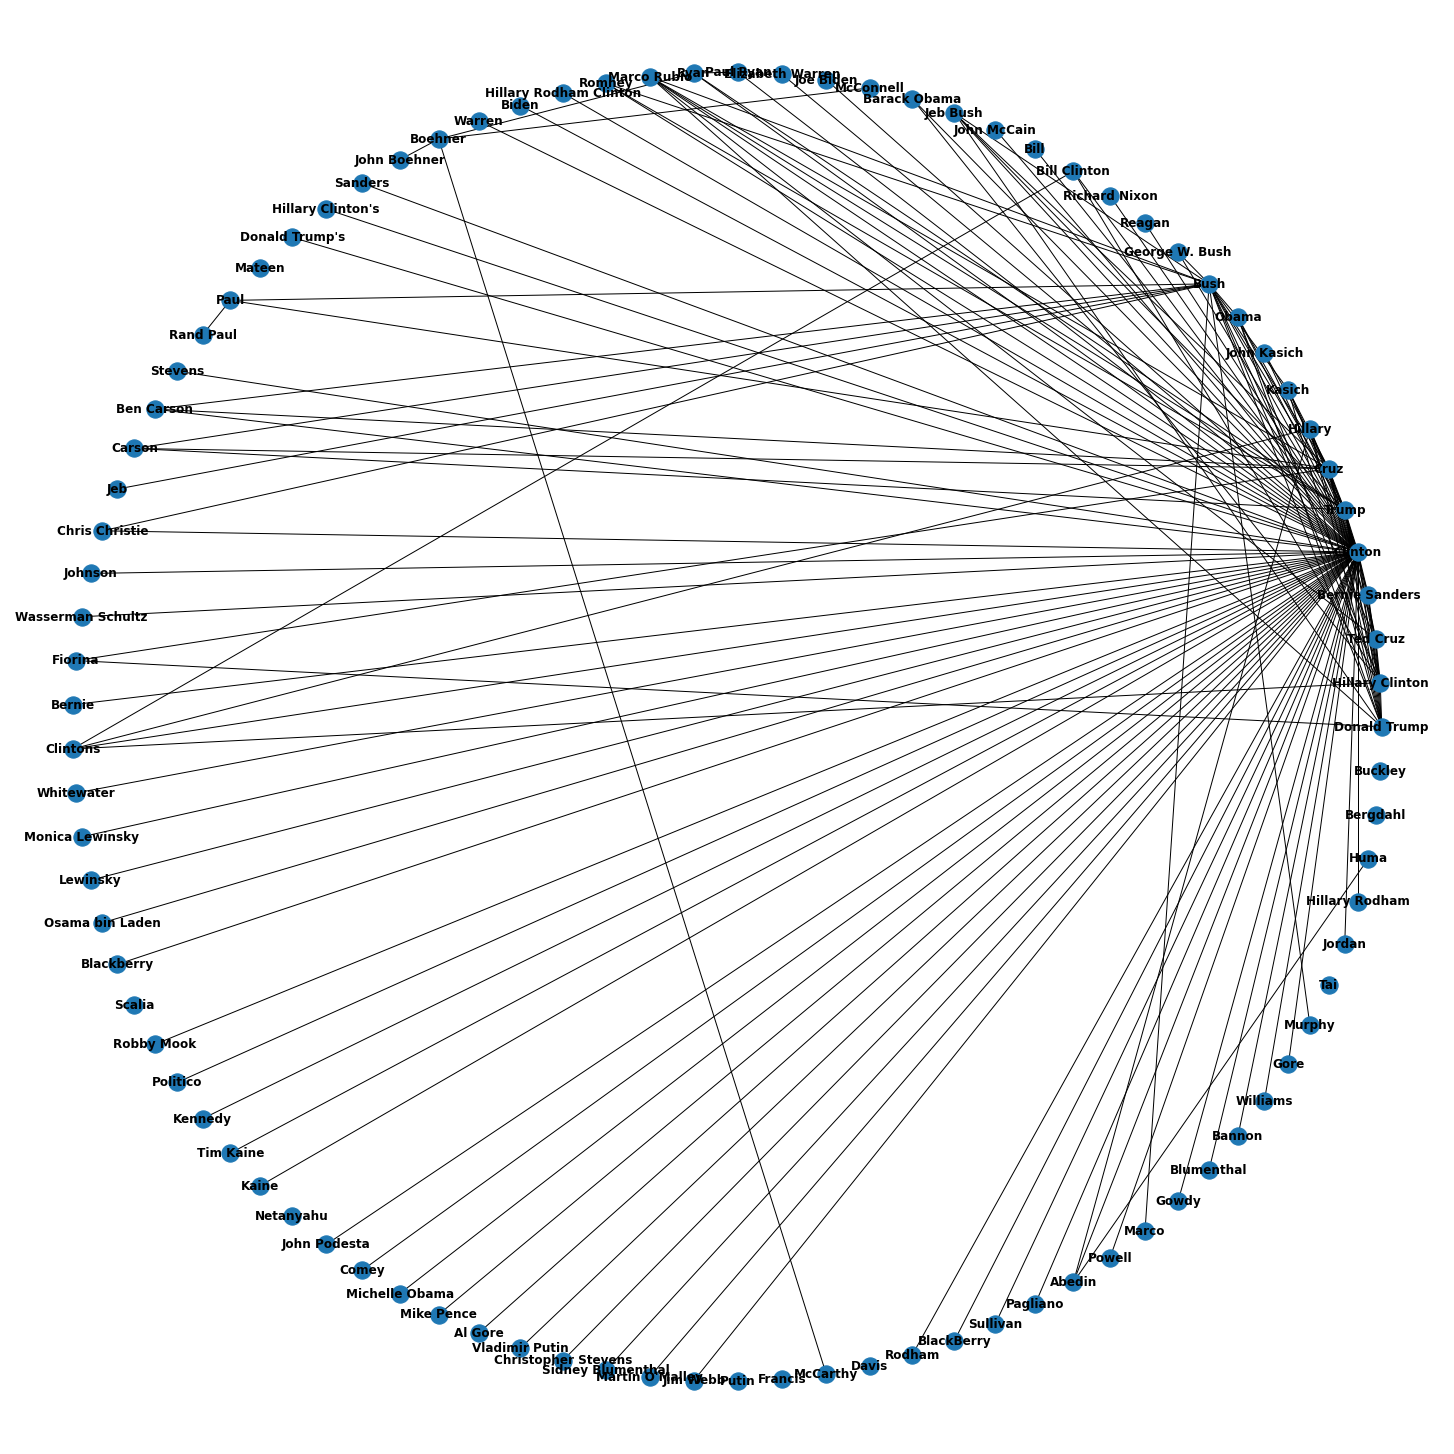

In [37]:
nx.draw_circular(G, with_labels = True, font_weight= 'bold')

__Centrality Measures__

In [59]:
#Eigenvector centrality (how important is each node?)
ev = nx.eigenvector_centrality(G)

In [61]:
#Betweenness
bc = nx.betweenness_centrality(G)

In [65]:
degree = nx.degree_centrality(G)

__Testing out the txt files for the Create_edgelist.py script__

In [11]:
#Testing out reading in txt files
text_file = os.path.join("..", "data", "Blackmore_Erema_1877.txt")

In [20]:
#create an empty list for the data 
text_list = []

with open(text_file, "r", encoding = "utf-8") as f:
    lines = f.read()
    text_list.append(lines)

In [17]:
#Trying the read lines part 
text_file2 = text_file

In [21]:
text_lines = []

with open(text_file2, "r", encoding = "utf-8") as f:
    lines = f.readlines()
    text_lines.append(lines)

In [25]:
text_lines2 = []

with open(text_file2, "r", encoding = "utf-8") as f:
    line = f.readline()
    while line:
        line = f.readline()
        text_lines2.append(line)

In [46]:
len(text_lines2)

2728